## 导入数据集

In [1]:
import urllib.parse
import urllib.request
import json

def get_district_map_info(keywords):
    mykey = ''  # 请替换为您自己的高德地图API密钥

    # 查询的接口地址
    url = 'https://restapi.amap.com/v3/config/district?'

    # 查询的条件
    params = {
        'key': mykey,
        'keywords': keywords,
        'subdistrict': '2',
        'showbiz': 'false',
        'extensions': 'all',
        'output': 'json',
        'level': 'district',
    }

    # 把查询条件组合成网页地址
    url_data = urllib.parse.urlencode(params)
    url = url + url_data

    # 创建一个访问器并发起HTTP请求
    request = urllib.request.Request(url)

    try:
        # 发起HTTP请求并读取网页内容
        response = urllib.request.urlopen(request)
        webpage = response.read()

        # 解码网页内容为字符串
        result = webpage.decode('utf8')

        # 解析JSON数据
        data = json.loads(result)

        # 返回行政区划信息
        return data['districts'][0]  # 因为设置了subdistrict=2，所以返回的数据列表中第一个元素就是厦门市的信息
    except Exception as e:
        print("Error occurred:", e)
        return None


In [2]:
if __name__ == "__main__":
    keywords = '厦门'
    df = get_district_map_info(keywords)
    if df:
        print(json.dumps(df, ensure_ascii=False, indent=4))
        polyline = df['polyline']
        polyline = polyline.split(';')
    else:
        print("Failed to retrieve district information.")

{
    "citycode": "0592",
    "adcode": "350200",
    "name": "厦门市",
    "polyline": "118.157144,24.553129;118.156304,24.55313;118.155265,24.553492;118.154711,24.553892;118.154468,24.554292;118.154589,24.554733;118.155022,24.555131;118.155663,24.555249;118.159413,24.555364;118.159889,24.555122;118.160054,24.554682;118.159976,24.554163;118.15846,24.553806;118.157741,24.553447;118.157144,24.553129|118.071342,24.435178;118.070291,24.435292;118.069543,24.435408;118.067936,24.435911;118.066362,24.436553;118.064181,24.436881;118.06252,24.437271;118.061373,24.43787;118.06066,24.438435;118.059791,24.439002;118.058304,24.440053;118.057156,24.441108;118.056634,24.442257;118.056348,24.444038;118.056522,24.445125;118.057661,24.44724;118.058826,24.449306;118.059461,24.450379;118.0604,24.452014;118.061035,24.452801;118.061835,24.453146;118.063599,24.453125;118.06486,24.453585;118.066389,24.45377;118.067267,24.453634;118.067998,24.452926;118.069049,24.451417;118.070405,24.450391;118.071412,24.449043;

In [3]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import geopandas
from shapely.geometry import Point,Polygon,shape


In [4]:
data = pd.DataFrame([df['districts'][0]])
data

,citycode,adcode,name,center,level,districts
0,0592,350203,思明区,"118.082745,24.445676",district,"[{'citycode': '0592', 'adcode': '350203', 'nam..."


In [5]:
polyline

['118.157144,24.553129',
 '118.156304,24.55313',
 '118.155265,24.553492',
 '118.154711,24.553892',
 '118.154468,24.554292',
 '118.154589,24.554733',
 '118.155022,24.555131',
 '118.155663,24.555249',
 '118.159413,24.555364',
 '118.159889,24.555122',
 '118.160054,24.554682',
 '118.159976,24.554163',
 '118.15846,24.553806',
 '118.157741,24.553447',
 '118.157144,24.553129|118.071342,24.435178',
 '118.070291,24.435292',
 '118.069543,24.435408',
 '118.067936,24.435911',
 '118.066362,24.436553',
 '118.064181,24.436881',
 '118.06252,24.437271',
 '118.061373,24.43787',
 '118.06066,24.438435',
 '118.059791,24.439002',
 '118.058304,24.440053',
 '118.057156,24.441108',
 '118.056634,24.442257',
 '118.056348,24.444038',
 '118.056522,24.445125',
 '118.057661,24.44724',
 '118.058826,24.449306',
 '118.059461,24.450379',
 '118.0604,24.452014',
 '118.061035,24.452801',
 '118.061835,24.453146',
 '118.063599,24.453125',
 '118.06486,24.453585',
 '118.066389,24.45377',
 '118.067267,24.453634',
 '118.067998,2

In [9]:
# Split each coordinate pair by the '|' character to separate individual coordinate strings
coordinates = [pair.split('|') for pair in polyline]

# Now 'coordinates' is a list of lists, each containing individual coordinate strings

p = []
for coordinate_pair in coordinates:
    for coordinate in coordinate_pair:
        a, b = coordinate.split(',')
        p.append([float(a), float(b)])

print(p)

[[118.157144, 24.553129], [118.156304, 24.55313], [118.155265, 24.553492], [118.154711, 24.553892], [118.154468, 24.554292], [118.154589, 24.554733], [118.155022, 24.555131], [118.155663, 24.555249], [118.159413, 24.555364], [118.159889, 24.555122], [118.160054, 24.554682], [118.159976, 24.554163], [118.15846, 24.553806], [118.157741, 24.553447], [118.157144, 24.553129], [118.071342, 24.435178], [118.070291, 24.435292], [118.069543, 24.435408], [118.067936, 24.435911], [118.066362, 24.436553], [118.064181, 24.436881], [118.06252, 24.437271], [118.061373, 24.43787], [118.06066, 24.438435], [118.059791, 24.439002], [118.058304, 24.440053], [118.057156, 24.441108], [118.056634, 24.442257], [118.056348, 24.444038], [118.056522, 24.445125], [118.057661, 24.44724], [118.058826, 24.449306], [118.059461, 24.450379], [118.0604, 24.452014], [118.061035, 24.452801], [118.061835, 24.453146], [118.063599, 24.453125], [118.06486, 24.453585], [118.066389, 24.45377], [118.067267, 24.453634], [118.0679

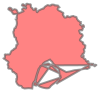

In [10]:
Polygon(p)

In [14]:
# Create a DataFrame with 'p' and specify column names
P = pd.DataFrame(p, columns=['Lng', 'Lat'])

# Save the DataFrame to a CSV file without including an index
P.to_csv(r'xiamen.csv', index=False)

In [15]:
#坐标转换

import pandas as pd
import json
import math
import os
import csv

x_pi = 3.14159265358979324 * 3000.0 / 180.0
pi = 3.1415926535897932384626  # π
a = 6378245.0  # 长半轴
ee = 0.00669342162296594323  # 扁率

def gcj02towgs84(lng, lat):
    """
    GCJ02(火星坐标系)转GPS84
    :param lng:火星坐标系的经度
    :param lat:火星坐标系纬度
    :return:
    """
    dlat = transformlat(lng - 105.0, lat - 35.0)
    dlng = transformlng(lng - 105.0, lat - 35.0)
    radlat = lat / 180.0 * pi
    magic = math.sin(radlat)
    magic = 1 - ee * magic * magic
    sqrtmagic = math.sqrt(magic)
    dlat = (dlat * 180.0) / ((a * (1 - ee)) / (magic * sqrtmagic) * pi)
    dlng = (dlng * 180.0) / (a / sqrtmagic * math.cos(radlat) * pi)
    mglat = lat + dlat
    mglng = lng + dlng
    return [lng * 2 - mglng, lat * 2 - mglat]

def transformlat(lng, lat):
    ret = -100.0 + 2.0 * lng + 3.0 * lat + 0.2 * lat * lat + \
        0.1 * lng * lat + 0.2 * math.sqrt(math.fabs(lng))
    ret += (20.0 * math.sin(6.0 * lng * pi) + 20.0 *
            math.sin(2.0 * lng * pi)) * 2.0 / 3.0
    ret += (20.0 * math.sin(lat * pi) + 40.0 *
            math.sin(lat / 3.0 * pi)) * 2.0 / 3.0
    ret += (160.0 * math.sin(lat / 12.0 * pi) + 320 *
            math.sin(lat * pi / 30.0)) * 2.0 / 3.0
    return ret

def transformlng(lng, lat):
    ret = 300.0 + lng + 2.0 * lat + 0.1 * lng * lng + \
        0.1 * lng * lat + 0.1 * math.sqrt(math.fabs(lng))
    ret += (20.0 * math.sin(6.0 * lng * pi) + 20.0 *
            math.sin(2.0 * lng * pi)) * 2.0 / 3.0
    ret += (20.0 * math.sin(lng * pi) + 40.0 *
            math.sin(lng / 3.0 * pi)) * 2.0 / 3.0
    ret += (150.0 * math.sin(lng / 12.0 * pi) + 300.0 *
            math.sin(lng / 30.0 * pi)) * 2.0 / 3.0
    return ret

if __name__ == '__main__':
    path = r'' # 请填写你的路径
    df = pd.read_csv(r'xiamen.csv')  
    with open(path+"xiamen_84.csv",'w',newline='') as file:
        writter = csv.writer(file)
        writter.writerow(['Lng','Lat'])
        for index,row in df.iterrows():
            i = gcj02towgs84(row['Lng'],row['Lat'])
            writter.writerow([i[0],i[1]])
        file.close()
    print("坐标转换完毕")

坐标转换完毕


In [16]:
data_84 = pd.read_csv(r'xiamen.csv')
data_84

,Lng,Lat
0,118.157144,24.553129
1,118.156304,24.553130
2,118.155265,24.553492
3,118.154711,24.553892
4,118.154468,24.554292
...,...,...
989,118.191684,24.536829
990,118.198689,24.530498
991,118.201607,24.525579
992,118.203244,24.518088


In [17]:
data_84 = np.array(data_84) #先将数据框转换为数组
data_84 = np.round(data_84,6)
data_84 = data_84.tolist() #其次转换为列表
data_84

[[118.157144, 24.553129],
 [118.156304, 24.55313],
 [118.155265, 24.553492],
 [118.154711, 24.553892],
 [118.154468, 24.554292],
 [118.154589, 24.554733],
 [118.155022, 24.555131],
 [118.155663, 24.555249],
 [118.159413, 24.555364],
 [118.159889, 24.555122],
 [118.160054, 24.554682],
 [118.159976, 24.554163],
 [118.15846, 24.553806],
 [118.157741, 24.553447],
 [118.157144, 24.553129],
 [118.071342, 24.435178],
 [118.070291, 24.435292],
 [118.069543, 24.435408],
 [118.067936, 24.435911],
 [118.066362, 24.436553],
 [118.064181, 24.436881],
 [118.06252, 24.437271],
 [118.061373, 24.43787],
 [118.06066, 24.438435],
 [118.059791, 24.439002],
 [118.058304, 24.440053],
 [118.057156, 24.441108],
 [118.056634, 24.442257],
 [118.056348, 24.444038],
 [118.056522, 24.445125],
 [118.057661, 24.44724],
 [118.058826, 24.449306],
 [118.059461, 24.450379],
 [118.0604, 24.452014],
 [118.061035, 24.452801],
 [118.061835, 24.453146],
 [118.063599, 24.453125],
 [118.06486, 24.453585],
 [118.066389, 24.4537

In [18]:
data['geometry'] = [Polygon(data_84)]   # 将转化后的坐标导入data数据集，变量名为geometry

In [19]:
data = geopandas.GeoDataFrame(data)
data

,citycode,adcode,name,center,level,districts,geometry
0,0592,350203,思明区,"118.082745,24.445676",district,"[{'citycode': '0592', 'adcode': '350203', 'nam...","POLYGON ((118.15714 24.55313, 118.15630 24.553..."


In [22]:
data = data.drop(['districts','citycode'],axis = 1)

In [23]:
data

,adcode,name,center,level,geometry
0,350203,思明区,"118.082745,24.445676",district,"POLYGON ((118.15714 24.55313, 118.15630 24.553..."


In [23]:
data.to_file(r"xiamen", encoding="utf-8")

d:\ProgramData\Anaconda3\lib\site-packages\geopandas\io\file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


In [24]:
data.to_file("xiamen.json", driver='GeoJSON', encoding="utf-8")

In [9]:
import math

def gcj02towgs84(localStr):
    lng = float(localStr.split(',')[0])
    lat = float(localStr.split(',')[1])
    PI = 3.1415926535897932384626
    ee = 0.00669342162296594323
    a = 6378245.0
    dlat = transformlat(lng - 105.0, lat - 35.0)
    dlng = transformlng(lng - 105.0, lat - 35.0)
    radlat = lat / 180.0 * PI
    magic = math.sin(radlat)
    magic = 1 - ee * magic * magic
    sqrtmagic = math.sqrt(magic)
    dlat = (dlat * 180.0) / ((a * (1 - ee)) / (magic * sqrtmagic) * PI)
    dlng = (dlng * 180.0) / (a / sqrtmagic * math.cos(radlat) * PI)
    mglat = lat + dlat
    mglng = lng + dlng
    return [lng * 2 - mglng,lat * 2 - mglat]

def transformlat(lng, lat):
    PI = 3.1415926535897932384626
    ret = -100.0 + 2.0 * lng + 3.0 * lat + 0.2 * lat * \
          lat + 0.1 * lng * lat + 0.2 * math.sqrt(abs(lng))
    ret += (20.0 * math.sin(6.0 * lng * PI) + 20.0 *
            math.sin(2.0 * lng * PI)) * 2.0 / 3.0
    ret += (20.0 * math.sin(lat * PI) + 40.0 *
            math.sin(lat / 3.0 * PI)) * 2.0 / 3.0
    ret += (160.0 * math.sin(lat / 12.0 * PI) + 320 *
            math.sin(lat * PI / 30.0)) * 2.0 / 3.0
    return ret


def transformlng(lng, lat):
    PI = 3.1415926535897932384626
    ret = 300.0 + lng + 2.0 * lat + 0.1 * lng * lng + \
          0.1 * lng * lat + 0.1 * math.sqrt(abs(lng))
    ret += (20.0 * math.sin(6.0 * lng * PI) + 20.0 *
            math.sin(2.0 * lng * PI)) * 2.0 / 3.0
    ret += (20.0 * math.sin(lng * PI) + 40.0 *
            math.sin(lng / 3.0 * PI)) * 2.0 / 3.0
    ret += (150.0 * math.sin(lng / 12.0 * PI) + 300.0 *
            math.sin(lng / 30.0 * PI)) * 2.0 / 3.0
    return ret


In [13]:
import requests
import json
from urllib.parse import quote
import xlwt


def get_poi(key, city, types, page):
    header = {
        'User-Agent':
        "" # 请填写你的User-Agent
    }

    url = f'https://restapi.amap.com/v3/place/text?key={key}&types={types}&city={quote(city)}&page={page}&output=josn'

    try:
        response = requests.get(url, headers=header)
        response.raise_for_status()
        content = response.json()
    except requests.exceptions.RequestException as e:
        print(f"An error occurred: {e}")
        return None

    return content


def get_times(key, city, types):
    page = 1
    poilist = []

    while True:
        result = get_poi(key, city, types, page)

        if result is None:
            break

        pois = result.get('pois', [])
        if pois:
            poilist.extend(pois)
            page += 1
        else:
            break

    return poilist


def write_to_excel(poilist, city, types):
    book = xlwt.Workbook(encoding='utf-8', style_compression=0)
    sheet = book.add_sheet(types, cell_overwrite_ok=True)

    headers = ['Lng', 'Lat', 'count', 'name', 'address', 'adname', 'type']
    for col, header in enumerate(headers):
        sheet.write(0, col, header)

    for i, poi in enumerate(poilist):
        location = poi['location']
        address = poi['address']
        adname = poi['adname']
        name = poi['name']
        lng, lat = location.split(",")

        # Add the logic for gcj02towgs84 here

        sheet.write(i + 1, 0, lng)
        sheet.write(i + 1, 1, lat)
        sheet.write(i + 1, 2, 1)
        sheet.write(i + 1, 3, name)
        sheet.write(i + 1, 4, address)
        sheet.write(i + 1, 5, adname)
        sheet.write(i + 1, 6, poi['type'])

    book.save(f"{city}_{types}.xls")


key = '' # 填写你的密钥
types = [
    '医疗保健服务', '餐饮服务', '风景名胜', '公司企业', '购物服务', '交通设施服务', '科教文化服务', '生活服务',
    '体育休闲服务'
]
city_list = ['湖里区', '思明区']

for city in city_list:
    for type in types:
        poi = get_times(key, city, type)
        if poi:
            print(f'当前城市：{city}，分类：{type}，总共有{len(poi)}条数据')
            write_to_excel(poi, city, type)
            print('*' * 50 + f'分类：{type}写入成功' + '*' * 50)
        else:
            print(f"无法获取数据：城市：{city}，分类：{type}")
print('====爬取完成====')


当前城市：湖里区，分类：医疗保健服务，总共有171条数据
**************************************************分类：医疗保健服务写入成功**************************************************
当前城市：湖里区，分类：餐饮服务，总共有196条数据
**************************************************分类：餐饮服务写入成功**************************************************
当前城市：湖里区，分类：风景名胜，总共有189条数据
**************************************************分类：风景名胜写入成功**************************************************
当前城市：湖里区，分类：公司企业，总共有191条数据
**************************************************分类：公司企业写入成功**************************************************
当前城市：湖里区，分类：购物服务，总共有195条数据
**************************************************分类：购物服务写入成功**************************************************
当前城市：湖里区，分类：交通设施服务，总共有198条数据
**************************************************分类：交通设施服务写入成功**************************************************
当前城市：湖里区，分类：科教文化服务，总共有195条数据
**************************************************分类：科教文化服务写入成功**************************************************
当前城市：湖里区，分类：生活服

In [14]:
import os
import pandas as pd

# 设置文件夹路径
folder_path = ''

# 获取文件夹中的所有文件名
file_names = os.listdir(folder_path)

# 创建一个空的DataFrame来存储整合后的数据
combined_data = pd.DataFrame()

# 遍历所有文件
for file_name in file_names:
    if file_name.endswith('.xls'):
        # 构建文件的完整路径
        file_path = os.path.join(folder_path, file_name)
        
        # 读取Excel文件的数据
        df = pd.read_excel(file_path)
        
        # 将读取的数据添加到整合后的DataFrame中
        combined_data = combined_data.append(df, ignore_index=True)

# 打印整合后的数据
print(combined_data)

# 将整合后的数据保存为一个新的Excel文件
combined_data.to_excel('', index=False)


/var/folders/sg/4tbtggb55k590h6qc67thpgr0000gn/T/ipykernel_91936/3379047876.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_data = combined_data.append(df, ignore_index=True)
/var/folders/sg/4tbtggb55k590h6qc67thpgr0000gn/T/ipykernel_91936/3379047876.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_data = combined_data.append(df, ignore_index=True)
/var/folders/sg/4tbtggb55k590h6qc67thpgr0000gn/T/ipykernel_91936/3379047876.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_data = combined_data.append(df, ignore_index=True)
/var/folders/sg/4tbtggb55k590h6qc67thpgr0000gn/T/ipykernel_91936/3379047876.py:23: FutureWarning: The frame.append method is deprecated and will be removed from panda

             Lng        Lat  count         name                 address  \
0     118.116000  24.467489      1          厦门站                 厦禾路900号   
1     118.115948  24.470662      1        梧村汽车站             厦禾路925-927号   
2     118.082837  24.450496      1     镇海路(地铁站)                     1号线   
3     118.069014  24.449775      1        三丘田码头                 延平路199号   
4     118.073150  24.454615      1  厦门轮渡码头(鹭江道)            鹭江道15号(近中山路)   
...          ...        ...    ...          ...                     ...   
3422  118.163690  24.532765      1          天泉宫  金福缘小区(五缘湾地铁站5号口步行270米)   
3423  118.159598  24.507912      1        穆厝大榕树                  穆厝社11号   
3424  118.145927  24.505500      1        薛岭山公园         建材MALL商圈祥岭路178号   
3425  118.188482  24.528126      1       厦门帆船租赁         泗水道与木浦路交叉口南160米   
3426  118.110012  24.549681      1          金钥匙                  厦门大桥南端   

     adname                type  
0       思明区      交通设施服务;火车站;火车站  
1       思明区  交通设施服务;长途汽车站;长途汽车站

In [1]:
# 地铁站台数据爬虫
import requests
import json
import csv
from lxml import etree

PAGE_URL = 'http://map.amap.com/subway/index.html?&1100'
DATA_URL = 'http://map.amap.com/service/subway?srhdata='
HEADER = {
    "User-Agent":
    ""# 请填写你的User-Agent
}


def fetchAllCity(url, header):
    r = requests.get(url, header)
    html = r.content
    element = etree.HTML(html)
    options = element.xpath("//a[contains(@class, 'city')]")

    cities = []
    for option in options:
        city = {
            'id': option.get('id'),
            'name': option.get('cityname'),
            'text': option.text
        }
        cities.append(city)
    return cities


def parseCityData(citys):
    for city in citys:
        parseCityPointFromApi(city)


def parseCityPointFromApi(city):
    url = DATA_URL + "{}_drw_{}.json".format(city['id'], city['name'])
    print(url)
    json_str = requests.get(url).text
    res = json.loads(json_str)
    res = res['l']
    for r in res:
        line_name = r.get('ln', '')
        line_stations = r.get('st', [])
        for station in line_stations:
            station_name = station.get('n', '')
            coords = station.get("sl", "").split(",")
            saveCityData(city, station_name, line_name, coords)


def saveCityData(city, station_name, line_name, coords):
    filename = city['name'] + '.csv'
    with open(filename, 'a', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow([station_name, line_name, coords[0], coords[1]])


def main():
    cities = fetchAllCity(PAGE_URL, HEADER)
    print(cities)
    parseCityData(cities)


if __name__ == '__main__':
    main()


[{'id': '1100', 'name': 'beijing', 'text': '北京'}, {'id': '3100', 'name': 'shanghai', 'text': '上海'}, {'id': '4401', 'name': 'guangzhou', 'text': '广州'}, {'id': '4403', 'name': 'shenzhen', 'text': '深圳'}, {'id': '4201', 'name': 'wuhan', 'text': '武汉'}, {'id': '1200', 'name': 'tianjin', 'text': '天津'}, {'id': '3201', 'name': 'nanjing', 'text': '南京'}, {'id': '8100', 'name': 'xianggang', 'text': '香港'}, {'id': '5000', 'name': 'chongqing', 'text': '重庆'}, {'id': '3301', 'name': 'hangzhou', 'text': '杭州'}, {'id': '2101', 'name': 'shenyang', 'text': '沈阳'}, {'id': '2102', 'name': 'dalian', 'text': '大连'}, {'id': '5101', 'name': 'chengdu', 'text': '成都'}, {'id': '2201', 'name': 'changchun', 'text': '长春'}, {'id': '3205', 'name': 'suzhou', 'text': '苏州'}, {'id': '4406', 'name': 'foshan', 'text': '佛山'}, {'id': '5301', 'name': 'kunming', 'text': '昆明'}, {'id': '6101', 'name': 'xian', 'text': '西安'}, {'id': '4101', 'name': 'zhengzhou', 'text': '郑州'}, {'id': '4301', 'name': 'changsha', 'text': '长沙'}, {'id': '3302